In [1]:
# Importing all the project pre-rquisites
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [2]:
# Importing dataset using short_name as df2

df2=pd.read_csv("E:/Data/use data/csv/London_underground_average_monthly_temperatures.csv")

In [3]:
df2.head()

,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Sub-surface_lines
0,21.7,21.0,16.4,19.5,19.3,18.4,16.4,11.9
1,21.5,21.0,17.9,19.8,19.0,18.3,17.1,11.3
2,21.7,20.9,18.2,20.0,18.7,17.7,16.7,11.4
3,23.4,22.8,20.3,21.4,20.3,19.6,18.4,15.3
4,25.4,24.7,21.9,22.9,22.4,21.5,20.3,18.3


In [4]:
#Checking null values

total_null = df2.isnull().sum()
print("The total number of null values are: " + str(total_null))

The total number of null values are: Bakerloo             0
Central              0
Jubilee              0
Northern             0
Piccadilly           0
Victoria             0
Waterloo_and_City    0
Sub-surface_lines    0
dtype: int64


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bakerloo           96 non-null     float64
 1   Central            96 non-null     float64
 2   Jubilee            96 non-null     float64
 3   Northern           96 non-null     float64
 4   Piccadilly         96 non-null     float64
 5   Victoria           96 non-null     float64
 6   Waterloo_and_City  96 non-null     float64
 7   Sub-surface_lines  96 non-null     float64
dtypes: float64(8)
memory usage: 6.1 KB


,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Sub-surface_lines
Bakerloo,1.000000,0.973739,0.937706,0.975710,0.964745,0.895368,0.845466,0.931754
Central,0.973739,1.000000,0.962590,0.954300,0.987364,0.837296,0.885859,0.973558
Jubilee,0.937706,0.962590,1.000000,0.930159,0.933937,0.793500,0.911652,0.954236
Northern,0.975710,0.954300,0.930159,1.000000,0.927357,0.896142,0.826756,0.899117
Piccadilly,0.964745,0.987364,0.933937,0.927357,1.000000,0.821503,0.860974,0.967900
Victoria,0.895368,0.837296,0.793500,0.896142,0.821503,1.000000,0.667242,0.747156
Waterloo_and_City,0.845466,0.885859,0.911652,0.826756,0.860974,0.667242,1.000000,0.875593
Sub-surface_lines,0.931754,0.973558,0.954236,0.899117,0.967900,0.747156,0.875593,1.000000


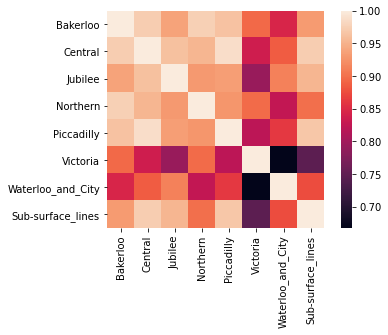

In [6]:
# check correlation of each values

corrmat = df2.corr()
sns.heatmap(corrmat, vmax=1, square=True)
#Correlation

df2.corr(method = "pearson")

<AxesSubplot:title={'center':'London_underground_average_monthly_temp'}>

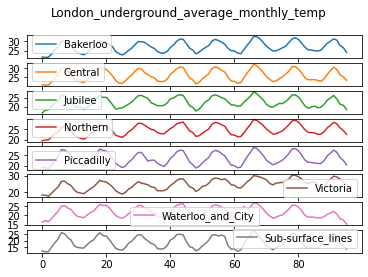

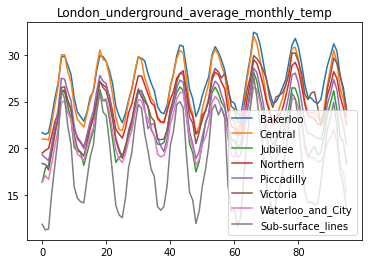

In [7]:
#Visualize the London_underground_average_monthly_temp
df2.plot.line(subplots = True, title='London_underground_average_monthly_temp')
df2.plot(title='London_underground_average_monthly_temp')

In [8]:
#IQR temp. Rate  Central

Q1 = np.percentile(df2['Central'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df2['Central'], 75, interpolation = 'midpoint')

IQR =Q3-Q1
print("IQR for Central Temp.:",IQR)
print("Previous shape:",df2.shape)
#Upper bound
upper = np.where(df2['Central'] >= (Q3+1.5*IQR))
#Lower Bound
lower = np.where(df2['Central'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)

print("New Shape:", df2.shape)

IQR for Central Temp.: 5.25
Previous shape: (96, 8)
New Shape: (96, 8)


In [9]:
#IQR Temp. rate London Bakerloo

Q1 = np.percentile(df2['Bakerloo'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df2['Bakerloo'], 75, interpolation = 'midpoint')

IQR =Q3-Q1
print("IQR for Bakerloo Temp. :",IQR)
print("Previous shape:",df2.shape)
#Upper bound
upper = np.where(df2['Bakerloo'] >= (Q3+1.5*IQR))
#Lower Bound
lower = np.where(df2['Bakerloo'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)

print("New Shape:", df2.shape)

IQR for Bakerloo Temp. : 4.419999999999998
Previous shape: (96, 8)
New Shape: (96, 8)


In [10]:
#IQR temp. rate Jubilee

Q1 = np.percentile(df2['Jubilee'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df2['Jubilee'], 75, interpolation = 'midpoint')

IQR =Q3-Q1
print("IQR for Jubilee:",IQR)
print("Previous shape:",df2.shape)
#Upper bound
upper = np.where(df2['Jubilee'] >= (Q3+1.5*IQR))
#Lower Bound
lower = np.where(df2['Jubilee'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)

print("New Shape:", df2.shape)

IQR for Jubilee: 4.52
Previous shape: (96, 8)
New Shape: (96, 8)


In [11]:
#Normalize data

from sklearn import preprocessing 
import numpy as np

a = np.random.random((1,4))
a = a*20
print("Data = ", a)

#Normalize the data attributes
normalized = preprocessing.normalize(a)
print("Normalized Data =", normalized)

Data =  [[ 1.91994182  3.05158091 16.67771019 18.91925308]]
Normalized Data = [[0.07535952 0.11977742 0.6546158  0.74259846]]


In [12]:
T = df2.iloc[:,13:20]
T = df2.loc[:,['Central','Bakerloo','Jubilee']]
from sklearn import preprocessing 
T = preprocessing.Normalizer().fit_transform(T)
T

array([[0.61111357, 0.63148402, 0.4772506 ],
       [0.60032843, 0.61462197, 0.51170852],
       [0.59377396, 0.61650215, 0.51706632],
       [0.59275992, 0.60835886, 0.52776431],
       [0.59301371, 0.60981977, 0.52578949],
       [0.6007209 , 0.60747058, 0.51972483],
       [0.60317137, 0.59713965, 0.52878023],
       [0.60299589, 0.6009859 , 0.52460642],
       [0.5970745 , 0.6118955 , 0.51873494],
       [0.59906072, 0.61674517, 0.51063847],
       [0.60325434, 0.62541471, 0.49491479],
       [0.59785404, 0.61855894, 0.5098582 ],
       [0.59674679, 0.61514867, 0.51525273],
       [0.60626932, 0.6225815 , 0.49480277],
       [0.60926658, 0.61440807, 0.50129529],
       [0.60646776, 0.61613258, 0.50257089],
       [0.6110482 , 0.60640144, 0.5088196 ],
       [0.60846203, 0.59998172, 0.5194188 ],
       [0.60806336, 0.59610146, 0.52433005],
       [0.6036394 , 0.6097781 , 0.51360505],
       [0.6048003 , 0.6048003 , 0.51810538],
       [0.6035417 , 0.61661481, 0.50549341],
       [0.

In [13]:
#correlation
df2.corr(method = "pearson")

,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Sub-surface_lines
Bakerloo,1.000000,0.973739,0.937706,0.975710,0.964745,0.895368,0.845466,0.931754
Central,0.973739,1.000000,0.962590,0.954300,0.987364,0.837296,0.885859,0.973558
Jubilee,0.937706,0.962590,1.000000,0.930159,0.933937,0.793500,0.911652,0.954236
Northern,0.975710,0.954300,0.930159,1.000000,0.927357,0.896142,0.826756,0.899117
Piccadilly,0.964745,0.987364,0.933937,0.927357,1.000000,0.821503,0.860974,0.967900
Victoria,0.895368,0.837296,0.793500,0.896142,0.821503,1.000000,0.667242,0.747156
Waterloo_and_City,0.845466,0.885859,0.911652,0.826756,0.860974,0.667242,1.000000,0.875593
Sub-surface_lines,0.931754,0.973558,0.954236,0.899117,0.967900,0.747156,0.875593,1.000000


D:\Programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


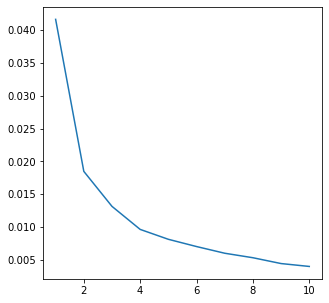

In [14]:
#Save components to a DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
PCA_components = pd.DataFrame(T)
PCA_components
from sklearn.cluster import KMeans
area = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(T)
    area.append(model.inertia_)
plt.figure(figsize=(5,5))
plt.plot(range(1,11), area)
plt.show()

In [15]:
#k means using 4 clusters and k-means++ initialization
from sklearn.cluster import KMeans
kmeans4 = KMeans(n_clusters=4)
y_kmeans4 = kmeans4.fit_predict(T)
print(y_kmeans4)

[1 3 3 2 2 2 2 2 2 3 1 3 3 1 3 3 2 2 2 2 2 3 1 1 3 3 2 2 2 2 2 2 0 0 3 3 0
 0 0 0 2 2 2 2 2 3 1 1 1 1 3 0 2 2 2 2 2 2 0 0 0 0 0 0 2 2 2 3 3 3 1 1 1 0
 0 3 3 3 2 3 3 1 1 1 1 3 1 1 1 3 3 3 1 1 1 1]


In [31]:
!pip install yellowbrick

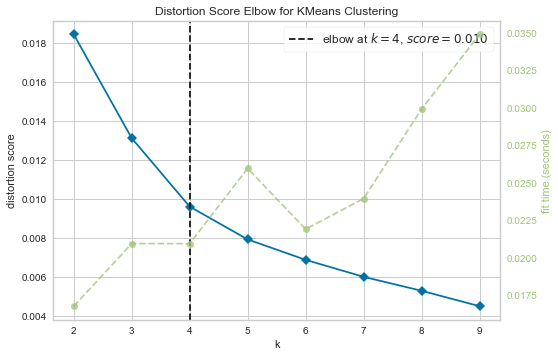

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans4, k=(2,10))
visualizer.fit(T)
visualizer.show()

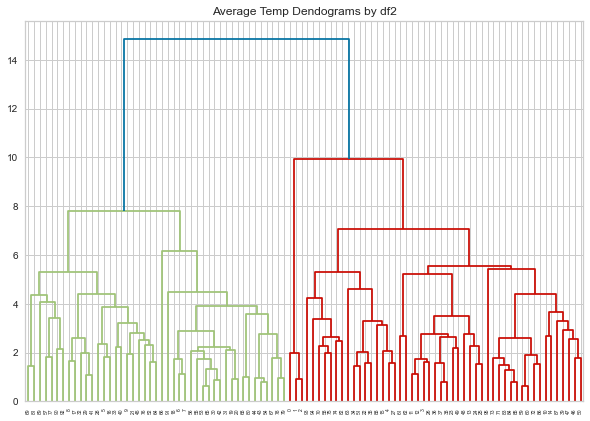

In [29]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Average Temp Dendograms by df2")
dend = shc.dendrogram(shc.linkage(df2, method='average'))

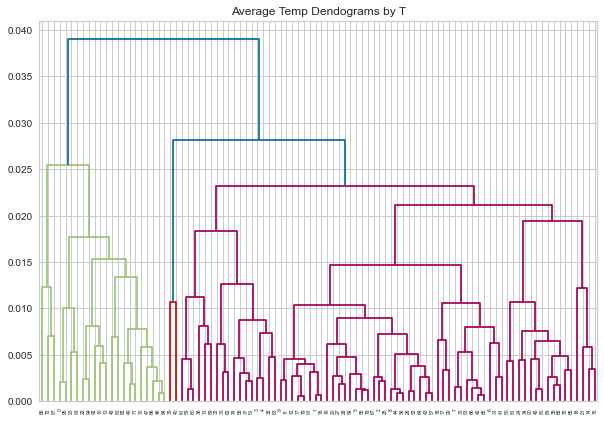

In [30]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Average Temp Dendograms by T")
dend = shc.dendrogram(shc.linkage(T, method='average'))